# Homework 1

In [127]:
import numpy as np
import matplotlib.pyplot as plt

1. Compute the Gradient of L explicitly.

In [128]:
# One-dimensional function
theta_0 = 1.0

def l(theta):
    return (theta -3)**2 + 1

def grad_l(theta):
    return 2*(theta -3)

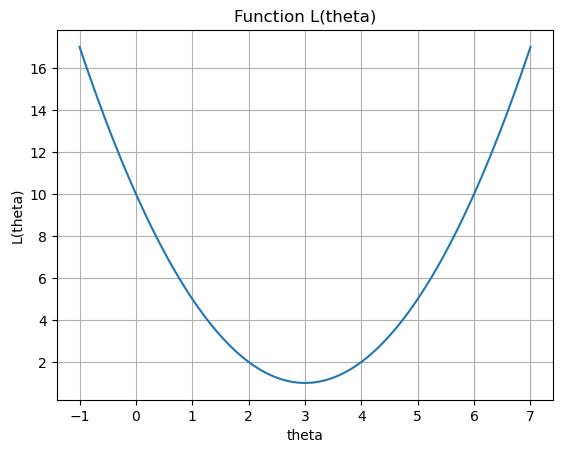

In [129]:
# Draw L(theta)
theta_vals = np.linspace(-1, 7, 100)
L_vals = l(theta_vals)
plt.plot(theta_vals, L_vals)
plt.xlabel('theta')
plt.ylabel('L(theta)')
plt.title('Function L(theta)')
plt.grid()
plt.show()

2. Implement the Gradient Descent to optimize 
 following what we introduced on the theoretical sections.

In [130]:
def GD(l, grad_l, theta_0, maxit, eta, tolL, tolTheta):
    loss_history = []
    theta_history = []

    # GD step
    for k in range(maxit):
        theta = theta_0 - eta * grad_l(theta_0)

        # viene fatta la norma per poter avere una misura scalare del vettore (o se theta fosse una matrice della matrice)
        # linalg.norm di base fa la norma 2 per i vettori e la norma di Frobenius per le matrici
        # controlliamo che la lunghezza del gradiente non sia troppo corta 
        # e che la differenza tra i parametri attuali e quelli precedenti non sia troppo piccola
        if(np.linalg.norm(grad_l(theta))<tolL or (np.linalg.norm(theta-theta_0)<tolTheta)):
            break

        loss_history.append(l(theta))
        theta_history.append(theta_0)

        theta_0 = theta
    return theta, k, loss_history, theta_history

In [131]:
maxit = 100
tolL = 1e-6
tolTheta = 1e-6
eta = 0.1

theta_opt, num_iter, _, _ = GD(l, grad_l, theta_0, maxit, eta, tolL, tolTheta)
print("Optimal theta:", theta_opt, " iterations:" , num_iter)
print("Optimal value of L:", l(theta_opt), " value of L at theta0:", l(theta_0))

Optimal theta: 2.9999961687611476  iterations: 58
Optimal value of L: 1.0000000000146785  value of L at theta0: 5.0


3-4. Test three different constant step sizes

In [132]:
etas = np.array([0.01, 0.2, 1.0])
loss_histories = []
theta_histories = []

for eta in etas:
    theta_opt, num_iter, loss_history, theta_history = GD(l, grad_l, theta_0, maxit, eta, tolL, tolTheta)
    loss_histories.append(loss_history)
    theta_histories.append(theta_history)
    print(f"Eta: {eta} => Optimal theta: {theta_opt}, iterations: {num_iter}, L(theta_opt): {l(theta_opt)}")


Eta: 0.01 => Optimal theta: 2.7347608882104932, iterations: 99, L(theta_opt): 1.0703517864228864
Eta: 0.2 => Optimal theta: 2.9999987718115575, iterations: 27, L(theta_opt): 1.0000000000015083
Eta: 1.0 => Optimal theta: 1.0, iterations: 99, L(theta_opt): 5.0


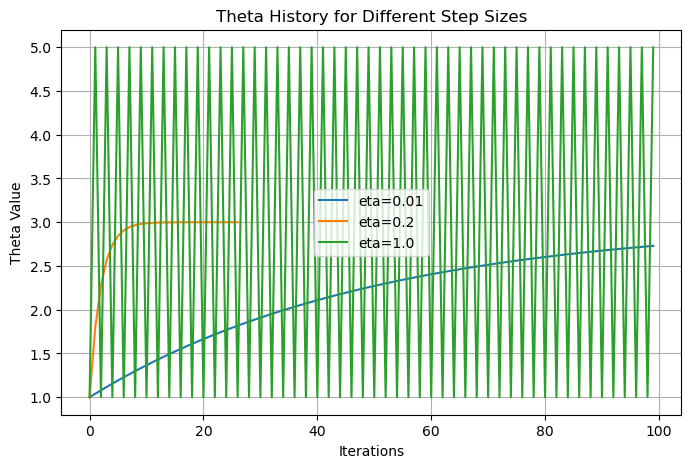

In [133]:
# Plotting theta histories for different etas on the same graph with the x axis as iterations
plt.figure(figsize=(8, 5))
for i, eta in enumerate(etas):
    plt.plot(theta_histories[i], label=f'eta={eta}')
plt.xlabel('Iterations')
plt.ylabel('Theta Value')
plt.title('Theta History for Different Step Sizes')
plt.legend()
plt.grid()
plt.show()

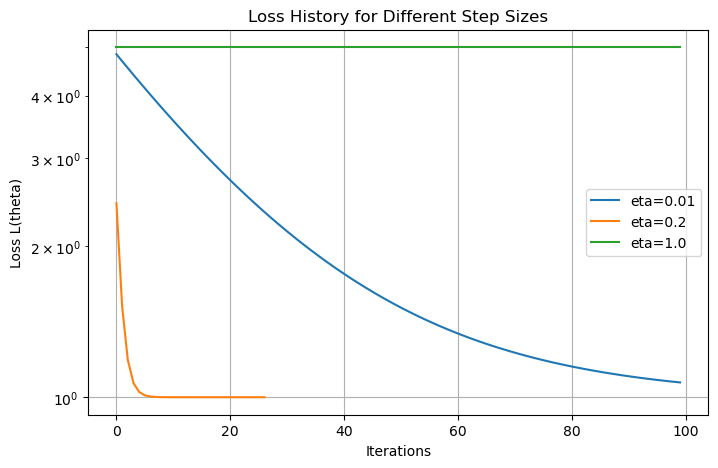

In [134]:
# Plotting the loss histories for different etas on the same graph with the x axis as iterations
plt.figure(figsize=(8, 5))
for i, eta in enumerate(etas):
    plt.plot(loss_histories[i], label=f'eta={eta}')
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss L(theta)')
plt.title('Loss History for Different Step Sizes')
plt.legend()
plt.grid()
plt.show()

Relate your observations to the discussion in class about:

-step-size being too small / too large,
-the role of convexity,
-how the “just right” step size leads to fast convergence.

# Exercise 2: Backtracking Line Search

In [135]:
def l(theta):
    return theta**4 + 3*(theta**2) + 2

def grad_l(theta):
    return 4*(theta**3) + 6*theta

Implement Gradient Descent with Backtracking, using the Armijo condition, considering the backtracking(...) function from class.

In [136]:
def backtracking(L, grad_L, theta, eta0=1.0, beta=0.5, c=1e-4):
    """
    Return a step size eta that satisfies the Armijo condition:
        L(theta - eta*g) <= L(theta) - c * eta * ||g||^2
    """
    eta = eta0
    g = grad_L(theta)
    g_norm2 = np.dot(g, g)

    # se:   Loss_k+1 > Loss_k - Armijo_constante * eta * norma_2_gradiente
    # allora riduci eta
    while L(theta - eta * g) > L(theta) - c * eta * g_norm2:
        eta *= beta
    return eta

In [137]:
def GD_backtracking(l, grad_l, theta_0, maxit, eta, tolL, tolTheta):
    loss_history = []
    theta_history = []

    # GD step
    for k in range(maxit):
        # compute step size via backtracking 
        eta = backtracking(l, grad_l, theta_0, eta0=eta)
        
        theta = theta_0 - eta * grad_l(theta_0)

        # viene fatta la norma per poter avere una misura scalare del vettore (o se theta fosse una matrice della matrice)
        # linalg.norm di base fa la norma 2 per i vettori e la norma di Frobenius per le matrici
        # controlliamo che la lunghezza del gradiente non sia troppo corta 
        # e che la differenza tra i parametri attuali e quelli precedenti non sia troppo piccola
        if(np.linalg.norm(grad_l(theta))<tolL or (np.linalg.norm(theta-theta_0)<tolTheta)):
            break

        loss_history.append(l(theta))
        theta_history.append(theta_0)

        theta_0 = theta
    return theta, k, loss_history, theta_history

2. Test different initial points theta=[-2 , 0.5, 2]

In [138]:
starting_thetas = [-2.0, 0.5, 2.0]

In [143]:
maxit = 100
tolL = 1e-6
tolTheta = 1e-6
eta = 0.5 # high initial step size because backtracking will reduce it as needed

loss_histories = []
theta_histories = []

for theta_0 in starting_thetas:
    theta_opt, num_iter, loss_history, theta_history = GD_backtracking(l, grad_l, theta_0, maxit, eta, tolL, tolTheta)
    loss_histories.append(loss_history)
    theta_histories.append(theta_history)
    print("Starting theta:", theta_0, " Optimal theta:", theta_opt, " iterations:" , num_iter)


Starting theta: -2.0  Optimal theta: 1.646331206943718e-06  iterations: 27
Starting theta: 0.5  Optimal theta: 2.6815081729777975e-07  iterations: 21
Starting theta: 2.0  Optimal theta: -1.646331206943718e-06  iterations: 27


3. For each starting point, plot:
    - the function curve L(theta) in 1D in the domain [-3, 3]
    - the trajectory of the iterates theta overlaid on the curve.

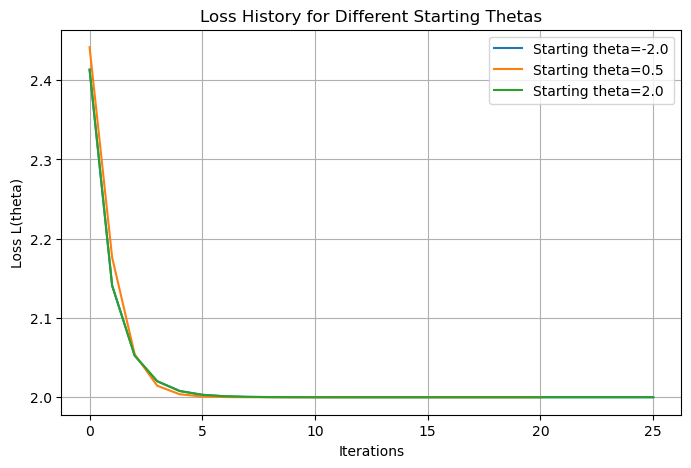

TypeError: array() got an unexpected keyword argument 'color'

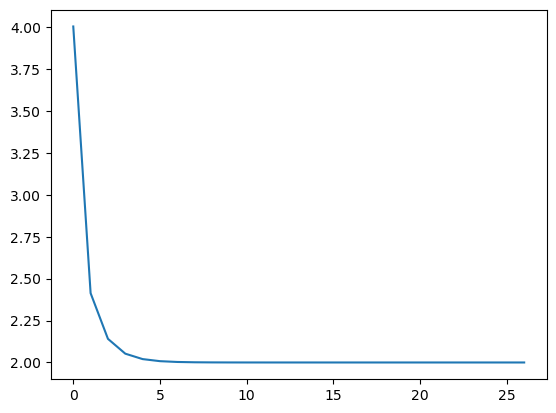

In [ ]:
plt.figure(figsize=(8, 5))
for i, loss_history in enumerate(loss_histories):
    # array con solo i valori in [-3, 3]
    filter_loss_in_range = [loss for loss in loss_histories[i] if -3 <= loss <= 3]
    plt.plot(filter_loss_in_range, label=f'Starting theta={starting_thetas[i]}')
    plt.xlabel('Iterations')
    plt.ylabel('Loss L(theta)')
    plt.title('Loss History for Different Starting Thetas')
    plt.legend()
    plt.grid()

plt.show()

plt.Figure(figsize=(8, 5))
# filter_loss_in_range = [loss for loss in loss_histories[0] if -3 <= loss <= 3]
plt.plot(loss_histories[0] , label='Starting theta=-2.0')
plt.show()